In [34]:
import sys
sys.path.insert(0, '../narzedzia/')
sys.path.insert(1, './wspolne/')

# Ignore warnings
import warnings

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from funkcje_rysujace import plot_distribution,plot_histograms


In [13]:
df=pd.read_csv('dane/train.csv',sep=',',header=0)


# Wybór cech do analizy danych (predictive variables)

W celu wykonania jak najdokładniejszego modelu kluczowe jest wyodrębnienie jak najdokładniejszych danych predykacyjnych.

In [10]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [14]:
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Analiza wartości zmiennych

- cechy jakościowe ( Survived, Sex, and Embarked,Pclass)    
- dane ilościowe
    - ciągłe (Age, Fare)
    - dyskretne (SibSp, Parch)
- dane mieszane (numeryczne+alfanumeryczne) Ticket
- dane nieustandaryzowane (Name) - występują skróty, nawiasy itp.

## Analiza typów danych

- siedem cech liczbowych (int, float)
- dwie cechy alfanumeryczne

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Analiza danych błędnych i brakujących

Na braki w danych podatne są zmienne Cabin i Age. W przypadku wyboru tych cech do predykcji wymagają one uzupełnienia.

##  Rozkład liczbowych wartości cech w próbkach

In [22]:
df.describe() #wyswietl tylko numeryczne

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


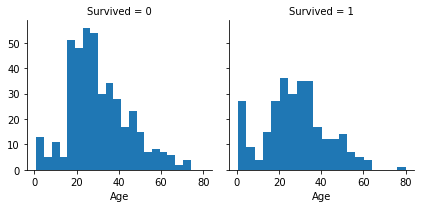

In [40]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

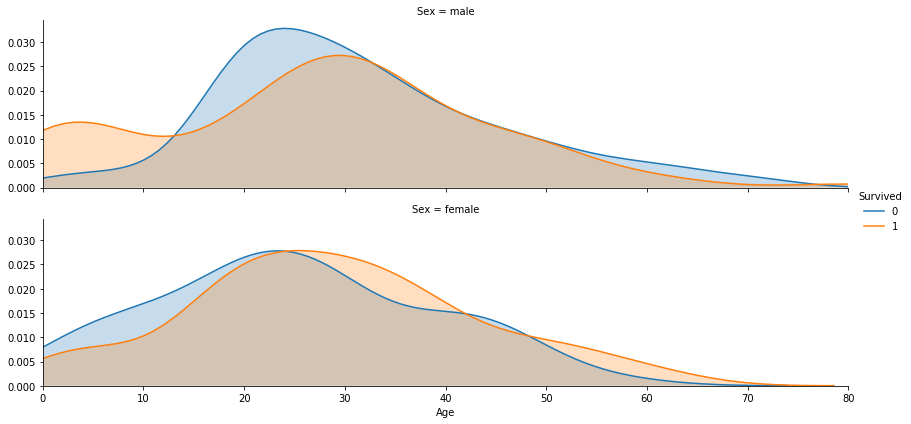

In [21]:
plot_distribution( df , var = 'Age' ,row='Sex', target = 'Survived')

## Wnioski

Cecha Age wykazuje silny wpływ na wynik przewidywania, więc powinna zostać uwzględniona w modelu

1. Należy zapewnić uzupełnienie wartości niezdefiniowanych
2. Wartości ciągłe należy przyporządkować do odpowiednich grup

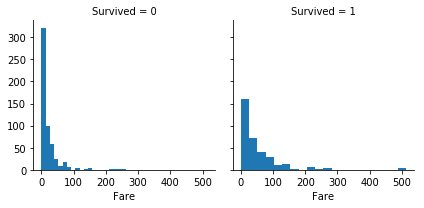

In [41]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Fare', bins=20)

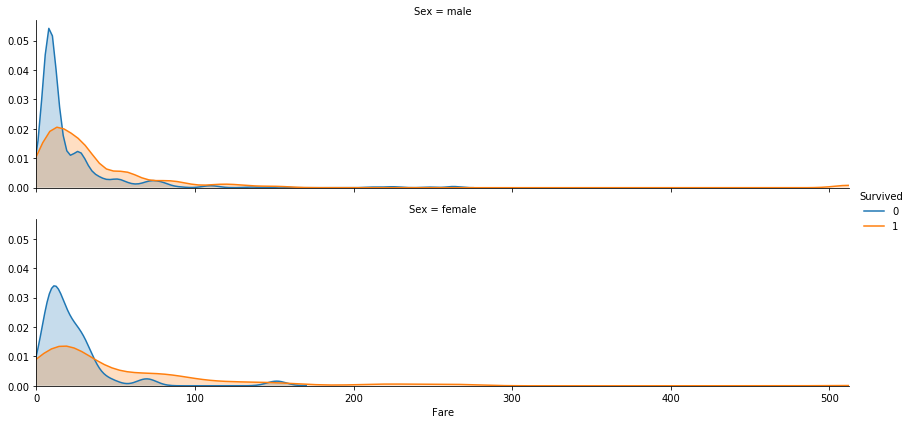

In [19]:
plot_distribution( df , var = 'Fare' , target = 'Survived' , row = 'Sex' )

### Wnioski TODO ????

## Rozkład wartości cech jakościowych

In [27]:
df.describe(include=['O']) #wyswietl tylko numeryczne

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",male,347082,G6,S
freq,1,577,7,4,644


### Wnioski

- Name - wartości unikalne w skali całej próbki
- Sex - dwie wartości 65% male (top=male, freq=577/count=891).
- Cabin - duża liczba duplikatów 
- Embarked - trzy wartości , najczęstsza to S (top=S)
- Ticket - duża ilość duplikatów (22%)


## Rozkład cech ilościowych i jakościowych (podsumowanie)

- Ticket - bez wpływu na wynik, dodatkowo duża ilość powtórzeń 
- Cabin - duża ilość błędnych i brakujących danych
- PassengerId - bez wpływu na wynik
- Name - brak standaryzacji

## Analiza cech obrotowych ????  ( pivoting features) todo do spawdzenia

Jeśli funkcje nie posiadają wartości nieokreślonych i są kategoryczne (płeć), porządkowe (Pclass) lub dyskretne (SibSp, Parch) to możliwe jest dokonanie dodatkowej analizy

In [30]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Cecha wykazuje dużą korelację (>0.5) z wynikiem - należy uwzględnić ją w modelu

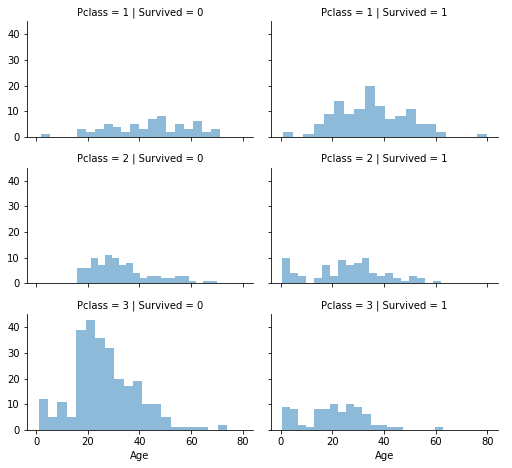

In [46]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Powyższy histogram pokazuje również korelację z cechą Age

In [29]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


Cecha wykazuje dużą korelację (>0.5) z wynikiem - należy uwzględnić ją w modelu

In [31]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [32]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Korelacja cech kategoryzujących


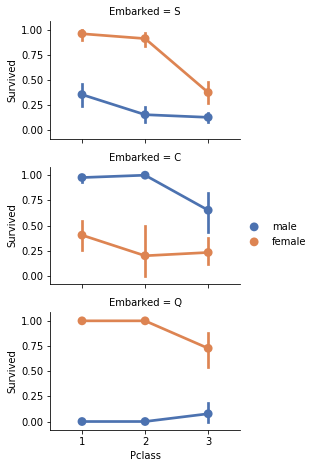

In [49]:
grid = sns.FacetGrid(df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

Zauważalna duża korelacja pomięcy Pclass, Embarked,Sex - Embarked powinna znaleźć się w modelu

## Korelacja cech kategoryzujących i numerycznych



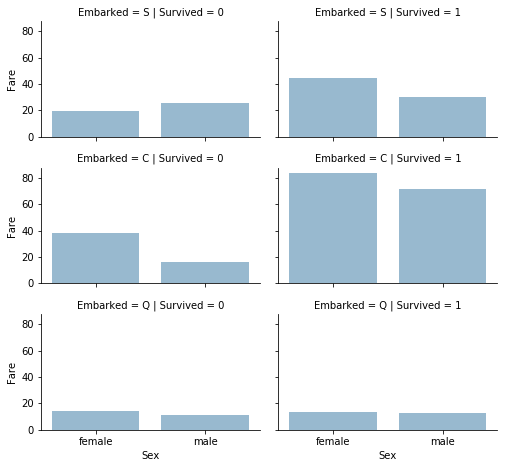

In [50]:
grid = sns.FacetGrid(df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()